In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import date


In [142]:
def plot_data(df):   
    max_range = 200
    data = df.to_numpy()
    fig, axs = plt.subplots(3,1, sharex = True, figsize=(15,25))
    st = fig.suptitle("Data plotted on", fontsize="x-large")
    axs[0].plot(data[:,0], data[:,4]*1e6, label = "Integerated mass mg")
    axs[0].plot(data[:,0], data[:,5]*1e6, label = "GT Mass mg")
    axs[0].plot(data[:,0], data[:,6]*1e6, label = "Desired Mass mg")    
    axs[0].set_xlabel("Time in seconds")
    axs[0].set_ylabel("Mass in mg")
    axs[0].set_title("Integrated mass vs GT mass vs Desired Mass")
    axs[0].legend()

    axs[1].plot(data[:,0], data[:,1], label = "Measured flow Value(l/min)")
    axs[1].plot(data[:,0], data[:,2], label = "Target flow Value(l/min)")
    axs[1].set_xlabel("Time in seconds")
    axs[1].set_ylabel("Volume flow rate in l/min")
    axs[1].set_title("Measured value of the flow rate")
    axs[1].legend()

    axs[2].plot(data[:,0], data[:,3], label = "Pressure in kPa")
    axs[2].set_xlabel("Time in seconds")
    axs[2].set_ylabel("Pressure in kPa")
    axs[2].set_title("Measured pressure")
    axs[2].legend()
    
#     axs[3].plot(data[:,0], data[:,3], label = "Integrated Mass kg")
#     axs[3].set_xlabel("Time in seconds")
#     axs[3].set_ylabel("Mass in kg")
#     axs[3].set_title("Integrated mass in kg")
#     axs[3].legend()
    
    
#     axs[4].plot(data[:,0], data[:,4], label = "GT Mass kg")
#     axs[4].set_xlabel("Time in seconds")
#     axs[4].set_ylabel("Mass in kg")
#     axs[4].set_title("Ground truth mass in kg")
#     axs[4].legend()
    
    
    
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)

    plt.show()

In [143]:
def plot_csv(file_path,del_t):
    mass_error = []
    time_delay = []
    time_delay.append(del_t)
    print("Data from time delay of", del_t," s\n\n")
    s = str(del_t)

    header_names = ['Time', 'Actual flow Value' , 'Target Flow', 'Pressure', 'Mass', 'Ground Truth Mass','Desired Mass']
    df = pd.read_csv(file_path, names = header_names)
    mass_temp = plot_data(df)

Data from time delay of 0.014  s




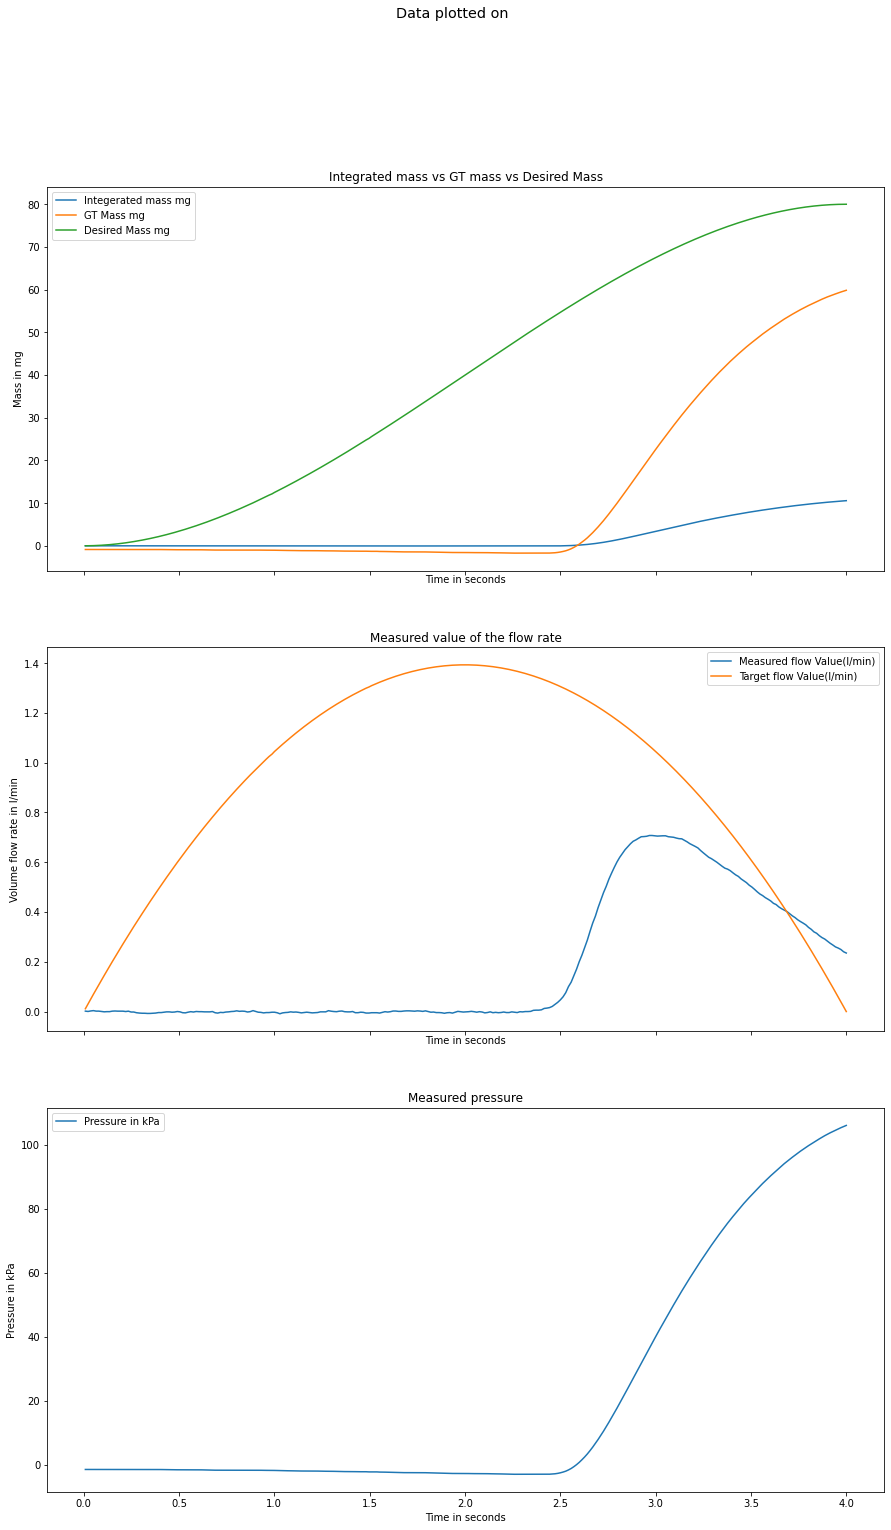

In [144]:
file_path_name = "./Data_from_PropValves/Kelly/Inflation/Inflating_finger_data_delt_014.csv"

plot_csv(file_path_name, 0.014)

In [136]:
header_names = ['Time', 'Actual flow Value' , 'Target Flow' 'Pressure', 'Mass', 'Ground Truth Mass','Desired Mass']
df = pd.read_csv(file_path_name, names = header_names)
data = df.to_numpy()
mass_max = np.max(data[:,3])
mass_max_gt = np.max(data[:,4])
offset = abs(mass_max - mass_max_gt)
corrected_integerated_mass = data[:,3] + offset

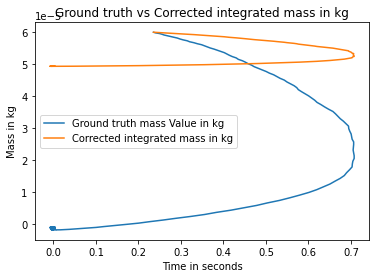

In [137]:
plt.plot(data[:,0], data[:,4], label = "Ground truth mass Value in kg")
plt.plot(data[:,0], corrected_integerated_mass,label = "Corrected integrated mass in kg")
plt.xlabel("Time in seconds")
plt.ylabel("Mass in kg")
plt.title("Ground truth vs Corrected integrated mass in kg")
plt.legend()
plt.show()

In [139]:
print(data.shape)

(283, 6)
